In [9]:
from src.constants import constants
from models.naive_bayes import NaiveBayes, create_ngram
from src.data import get_train_test_split, regexp_processing
from src.criterion import get_recall

import seaborn as sns
import numpy as np

In [4]:
train_df, test_df = get_train_test_split("10_ports.csv", transform=regexp_processing)

In [5]:
model = NaiveBayes(n=3, classes=constants["classes"])
model.fit(train_df)

100%|██████████| 198/198 [00:00<00:00, 350.06it/s]


In [7]:
ngrams_grid = np.arange(1,5)
accuracies = []

for n in ngrams_grid:
    model = NaiveBayes(n, constants["classes"])
    model.fit(train_df)
    
    accuracy, _ = model.eval(test_df)
    accuracies.append(accuracy)

 42%|████▏     | 83/198 [00:00<00:00, 828.15it/s]

Accuracy: 0.26 | Errors: 37


 37%|███▋      | 73/198 [00:00<00:00, 364.38it/s]

Accuracy: 0.5 | Errors: 25


  0%|          | 0/198 [00:00<?, ?it/s]

Accuracy: 0.38 | Errors: 31


100%|██████████| 50/50 [00:02<00:00, 19.91it/s]

Accuracy: 0.24 | Errors: 38


/home/achraf/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Accuracy'), Text(0.5, 0, 'N-gram'), Text(0, 0.5, 'Accuracy')]

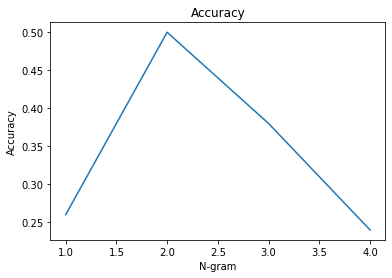

In [8]:
sns.lineplot(ngrams_grid, accuracies).set(title="Accuracy", xlabel="N-gram", ylabel="Accuracy")

In [13]:
model = NaiveBayes(n=2, classes=constants['classes'])
model.fit(train_df)

print(f"Recall @1,2,3 - {get_recall(model, test_df)}")

100%|██████████| 198/198 [00:00<00:00, 839.65it/s]

Recall @1,2,3 - (0.24, 0.26, 0.42)
